In [2]:
import os
import numpy as np
from skimage import io, transform, color
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\HAI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


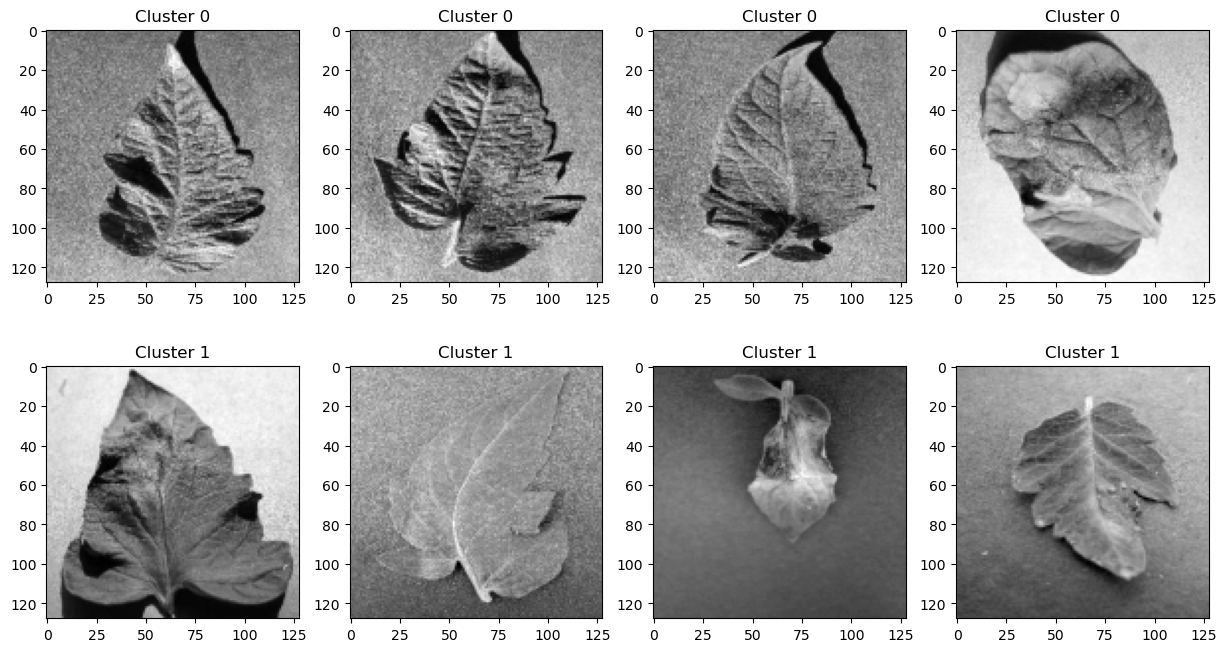

In [4]:
image_size = (128, 128)
num_classes = 2  # Update to the correct number of classes in your dataset

# Function to load the dataset
def load_dataset(data_dir):
    X = []
    y = []
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        for image_file in os.listdir(class_dir):
            if image_file.endswith(".JPG"):
                img = io.imread(os.path.join(class_dir, image_file))
                img = transform.resize(img, image_size)
                img = color.rgb2gray(img)
                X.append(img)
                y.append(class_name)

    X = np.array(X)
    y = np.array(y)

    X = X / 255.0

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    return X, y

# Load the dataset
data_dir = r'C:\Users\HAI\Desktop\project\New folder'
X, y = load_dataset(data_dir)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Flatten the images for k-means clustering
X_train_flat = X_train.reshape((X_train.shape[0], -1))

# Perform k-means clustering
num_clusters = 2  # Update to the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_flat)
y_kmeans = kmeans.predict(X_train_flat)

# Visualize the clustered images
plt.figure(figsize=(15, 8))
for i in range(num_clusters):
    cluster_samples = X_train[y_kmeans == i][:4]
    for j, sample in enumerate(cluster_samples):
        plt.subplot(num_clusters, 4, i * 4 + j + 1)
        plt.imshow(sample.reshape(image_size), cmap='gray')
        plt.title(f'Cluster {i}')

plt.show()

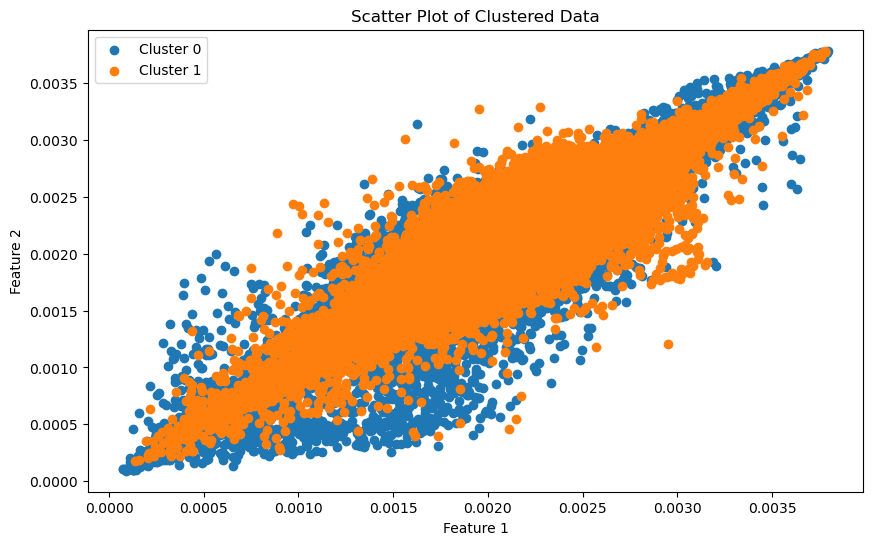

In [5]:
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_samples = X_train[y_kmeans == i]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {i}')

plt.title('Scatter Plot of Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

C:\Users\HAI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


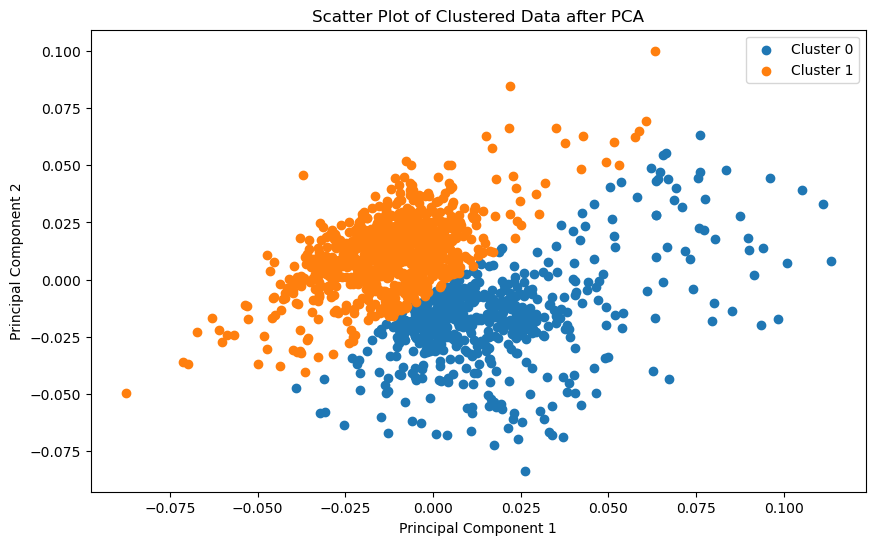

In [8]:
import os
import numpy as np
from skimage import io, transform, color
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

image_size = (128, 128)
num_classes = 2  # Update to the correct number of classes in your dataset

# Function to load the dataset
def load_dataset(data_dir):
    X = []
    y = []
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        for image_file in os.listdir(class_dir):
            if image_file.endswith(".JPG"):
                img = io.imread(os.path.join(class_dir, image_file))
                img = transform.resize(img, image_size)
                img = color.rgb2gray(img)
                X.append(img)
                y.append(class_name)

    X = np.array(X)
    y = np.array(y)

    X = X / 255.0

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    return X, y

# Load the dataset
data_dir = r'C:\Users\HAI\Desktop\project\New folder'
X, y = load_dataset(data_dir)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Flatten the images for k-means clustering
X_train_flat = X_train.reshape((X_train.shape[0], -1))

# Apply PCA to reduce dimensionality
num_components = 2  # Set the desired number of principal components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_flat)

# Perform k-means clustering on PCA-transformed data
num_clusters = 2  # Update to the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_train_pca)
y_kmeans = kmeans.predict(X_train_pca)

# Scatter plot for the clustered data after PCA
plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_samples = X_train_pca[y_kmeans == i]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {i}')

plt.title('Scatter Plot of Clustered Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
